In [ ]:
!pip install tldextract
!pip install tld

import pandas as pd
import seaborn as sns #vẽ đồ thị thống kê và biểu đồ
import matplotlib.pyplot as plt #vẽ đồ thị và biểu đồ

from urllib.parse import urlparse #module của thư viện urllib, được sử dụng để phân tích các thành phần của URL như scheme, netloc, path, params, query, và fragment
import tldextract #trích xuất các thành phần của một URL, bao gồm tên miền, tên miền cấp cao nhất (TLD), và tên miền phụ
import re #hỗ trợ cho các biểu thức chính quy (regular expressions)
from tld import get_tld # lấy top level domain (com, xyz, ...)
import string
from yellowbrick.features import Rank1D

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/URL_DETECTION/Dataset_URL.csv")
df

,url,label
0,http://www.teramill.com,1
1,http://www.f0519141.xsph.ru,1
2,http://www.shprakserf.gq,1
3,https://service-mitld.firebaseapp.com/,1
4,http://www.kuradox92.lima-city.de,1
...,...,...
600177,https://www.forumopolis.com,0
600178,https://www.helloworldlive.com,0
600179,https://www.law.wisc.edu/news/In_the_Media/Ric...,0
600180,https://www.lyrics.wikia.com/Ion_Dissonance,0


In [ ]:
class FeatureExtraction:
  def __init__(self):
    pass

  def haveIP(self, url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

  def lenURL(self, url):
    return len(url)

  def lenHostname(self, url):
    try:
      return len(urlparse(url).hostname)
    except:
      return 0

  def tinyURL(self, url):
    #listing shortening services
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                          r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                          r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                          r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                          r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                          r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                          r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                          r"tr\.im|link\.zip\.net"

    return 1 if re.search(shortening_services,url) else 0

  # def httpDomain(self, url):
  #   domain = urlparse(url).netloc.lower()
  #   return 1 if 'http' in domain else 0

  def abnormal_url(self, url):
    hostname = urlparse(url).hostname
    hostname = str(hostname).lower()
    try:
      match = re.search(hostname, url.lower())
      return 0 if match else 1
    except:
      return 1

  def suspicious_tlds(self, url):
    suspicious_tlds = [
      'tk', 'pw', 'info', 'biz', 'xyz', 'top', 'club', 'work', 'online',
      'site', 'website', 'space', 'click', 'link', 'download', 'trade', 'cn'
      'review', 'party', 'win', 'stream', 'gdn', 'racing', 'science', 'net'
      'gq', 'icu', 'ooo', 'mobi', 'fun', 'buzz', 'kim', 'ga', 'cf', 'org', 'ml', 'co', 'ru'
    ]
    try:
      tld = get_tld(url)
      if tld in suspicious_tlds: return 1
      else: return 0
    except:
      return 1

  def digit_count(self, url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


  def letter_count(self, url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

  def special_chars_count(self, url):
    special_chars = set(string.punctuation)
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

  def haveAtSign(self, url):
    return 1 if "@" in url else 0

  def haveDash(self, url):
    return 1 if '-' in urlparse(url).netloc else 0 #netloc là tên miền bao gồm cả cổng, hostname không bao gồm cổng

  def redirection(self, url):
    pos = url.rfind('//')
    if pos > 6:
      return 1 if pos > 7 else 0
    return 0

  def subDomains(self, url):
    url = str(url)
    url = url.replace("www.", "")
    url = url.replace("." + tldextract.extract(url).suffix, "")
    count = url.count(".")
    return 1 if count > 1 else 0

In [ ]:
feature = FeatureExtraction()

In [ ]:
df_ex = df.copy()

df_ex["haveIP"] = df_ex["url"].apply( lambda x: feature.haveIP(x))
df_ex["lenURL"] = df_ex["url"].apply( lambda x: feature.lenURL(x))
df_ex["lenHostname"] = df_ex["url"].apply( lambda x: feature.lenHostname(x))
df_ex["tinyURL"] = df_ex["url"].apply( lambda x: feature.tinyURL(x))
# df_ex["httpDomain"] = df_ex["url"].apply( lambda x: feature.httpDomain(x))
df_ex["abnormal_url"] = df_ex["url"].apply( lambda x: feature.abnormal_url(x))
df_ex["suspicious_tlds"] = df_ex["url"].apply( lambda x: feature.suspicious_tlds(x))
df_ex["digit_count"] = df_ex["url"].apply( lambda x: feature.digit_count(x))
df_ex["letter_count"] = df_ex["url"].apply( lambda x: feature.letter_count(x))
df_ex["special_chars_count"] = df_ex["url"].apply( lambda x: feature.special_chars_count(x))
df_ex["have@"] = df_ex["url"].apply( lambda x: feature.haveAtSign(x))
df_ex["redirection"] = df_ex["url"].apply( lambda x: feature.redirection(x))
df_ex["have-"] = df_ex["url"].apply( lambda x: feature.haveDash(x))
df_ex["subDomains"] = df_ex["url"].apply( lambda x: feature.subDomains(x))

# Trộn ngẫu nhiên các dòng dữ liệu để đảm bảo phân phối đều khi chia tập train và test.
df_ex = df_ex.sample(frac = 1).reset_index(drop = True)

In [ ]:
df_ex

,url,label,haveIP,lenURL,lenHostname,tinyURL,abnormal_url,suspicious_tlds,digit_count,letter_count,special_chars_count,have@,redirection,have-,subDomains
0,http://www.yumate.co/DFpanel/,1,0,29,13,0,0,1,0,22,7,0,0,0,0
1,https://www.eliteholidaydecor.com,0,0,33,25,0,0,0,0,28,5,0,0,0,0
2,https://www.hamiltoncountyjails.info/?pageno=14,0,0,47,28,0,0,1,2,37,8,0,0,0,0
3,https://www.microradio.ca/news.html,0,0,35,17,0,0,0,0,28,7,0,0,0,0
4,https://uspz.usspaoj.top/,1,0,25,16,0,0,1,0,19,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600177,https://www.obituaries.kjonline.com/obituaries...,0,0,122,27,0,0,0,9,96,17,0,0,0,1
600178,https://www.cosmiccafedallas.com/,0,0,33,24,0,0,0,0,27,6,0,0,0,0
600179,https://www.ca.answers.yahoo.com/question/inde...,0,0,73,24,0,0,0,14,48,11,0,0,0,1
600180,https://www.minnesota.schooltree.org/public/Le...,0,0,75,28,0,0,1,6,58,11,0,0,0,1


In [ ]:
df_final = df_ex.copy().drop('url', axis=1)
df_final.apply(lambda x: x.value_counts()).transpose()

,0,1,2,3,4,5,6,7,8,9,...,504,554,573,631,649,650,651,653,734,779
label,300091.0,300091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
haveIP,596636.0,3546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lenURL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,11.0,...,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
lenHostname,39330.0,3.0,NaN,12.0,954.0,1001.0,1436.0,3466.0,1841.0,3680.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tinyURL,565461.0,34721.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_url,560865.0,39317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suspicious_tlds,485993.0,114189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
digit_count,320778.0,35400.0,30623.0,23486.0,24742.0,16715.0,25858.0,16355.0,15204.0,9717.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
letter_count,NaN,NaN,NaN,1.0,1019.0,62.0,84.0,373.0,296.0,500.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
special_chars_count,NaN,NaN,878.0,2335.0,6883.0,115713.0,88993.0,70474.0,65816.0,56096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Lưu DataFrame đã được tiền xử lý vào file CSV.
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/URL_DETECTION/URL_Feature_Extraction.csv', encoding = 'utf-8', index=False)

In [ ]:
fe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/URL_DETECTION/URL_Feature_Extraction.csv')
fe

,label,haveIP,lenURL,lenHostname,tinyURL,abnormal_url,suspicious_tlds,digit_count,letter_count,special_chars_count,have@,redirection,have-,subDomains
0,1,0,29,13,0,0,1,0,22,7,0,0,0,0
1,0,0,33,25,0,0,0,0,28,5,0,0,0,0
2,0,0,47,28,0,0,1,2,37,8,0,0,0,0
3,0,0,35,17,0,0,0,0,28,7,0,0,0,0
4,1,0,25,16,0,0,1,0,19,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600177,0,0,122,27,0,0,0,9,96,17,0,0,0,1
600178,0,0,33,24,0,0,0,0,27,6,0,0,0,0
600179,0,0,73,24,0,0,0,14,48,11,0,0,0,1
600180,0,0,75,28,0,0,1,6,58,11,0,0,0,1


In [ ]:
# Tạo ra một tóm tắt thống kê của các giá trị trong DataFrame
# mean: Trung bình cộng của các giá trị trong cột.
# std: Độ lệch chuẩn của các giá trị trong cột.
# min: Giá trị nhỏ nhất trong cột.
# 25%: Giá trị thứ 25 (phân vị thứ 1/4) trong cột.
# 50%: Giá trị thứ 50 (phân vị thứ 2/4) trong cột.
# 75%: Giá trị thứ 75 (phân vị thứ 3/4) trong cột.
# max: Giá trị lớn nhất trong cột.
fe.describe()

,label,haveIP,lenURL,lenHostname,tinyURL,abnormal_url,suspicious_tlds,digit_count,letter_count,special_chars_count,have@,redirection,have-,subDomains
count,600182.0,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000,600182.000000
mean,0.5,0.005908,54.077173,19.433365,0.057851,0.065508,0.190257,4.440018,40.579856,9.055548,0.008707,0.005645,0.139599,0.158530
std,0.5,0.076638,36.361096,10.574558,0.233461,0.247421,0.392504,10.299602,25.588910,5.034872,0.092906,0.074921,0.346571,0.365238
min,0.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,30.000000,14.000000,0.000000,0.000000,0.000000,0.000000,23.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,0.5,0.000000,43.000000,18.000000,0.000000,0.000000,0.000000,0.000000,34.000000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,65.000000,23.000000,0.000000,0.000000,0.000000,5.000000,50.000000,11.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,779.000000,150.000000,1.000000,1.000000,1.000000,631.000000,504.000000,173.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

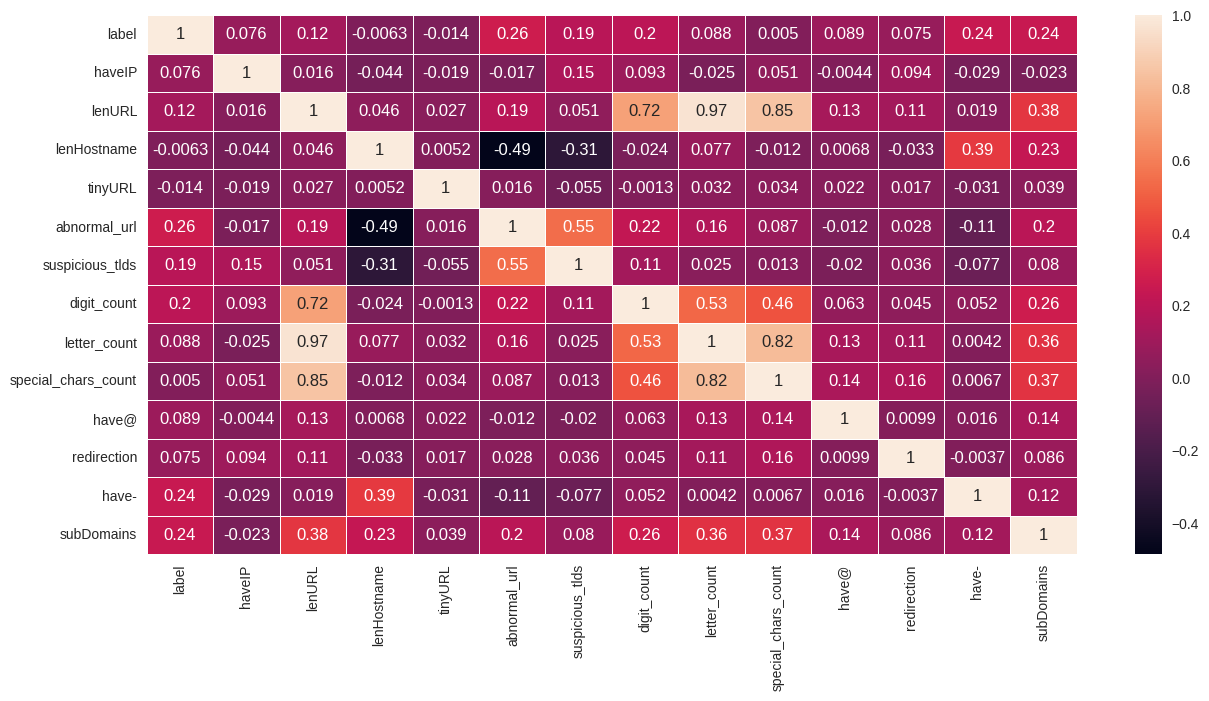

In [ ]:
# Tạo biểu đồ HeatMap
plt.figure(figsize = (15, 7)) # Rộng: 15, Cao: 7
# Tạo HeatMap với thông số:
# Hiển thị giá trị tương quan trên từng ô của HeatMap.
# Điều chỉnh độ dày đường viền của các ô.
sns.heatmap(fe.corr(),annot = True, linewidth = 0.5)

In [ ]:
fe.columns

Index(['label', 'haveIP', 'lenURL', 'lenHostname', 'tinyURL', 'abnormal_url',
       'suspicious_tlds', 'digit_count', 'letter_count', 'special_chars_count',
       'have@', 'redirection', 'have-', 'subDomains'],
      dtype='object')

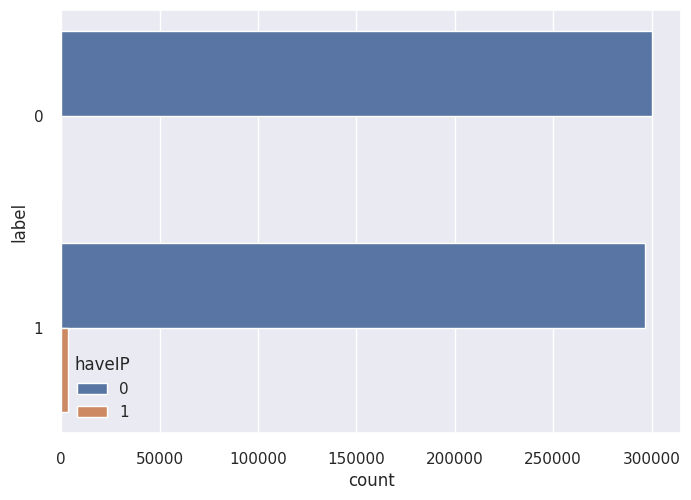

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="label", data=fe,hue="haveIP")

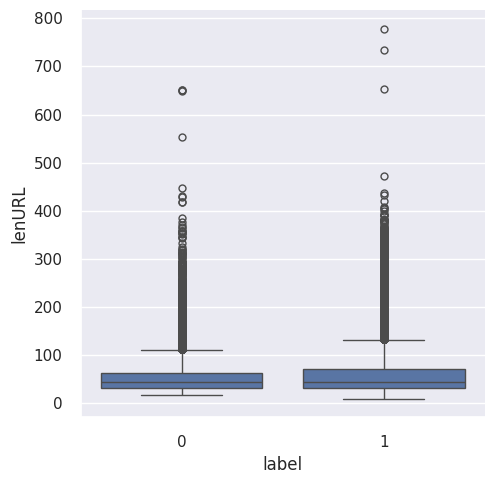

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="label", y="lenURL", kind="box", data=fe)

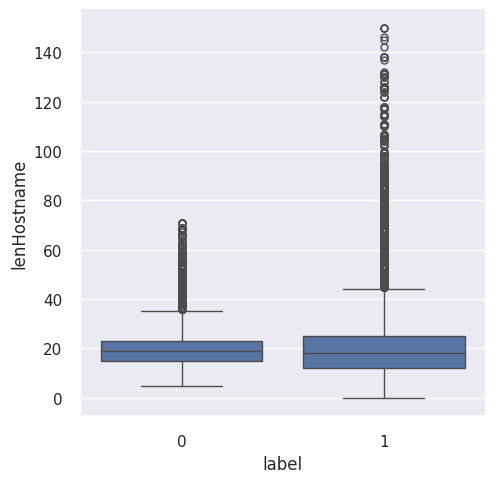

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="label", y="lenHostname", kind="box", data=fe)

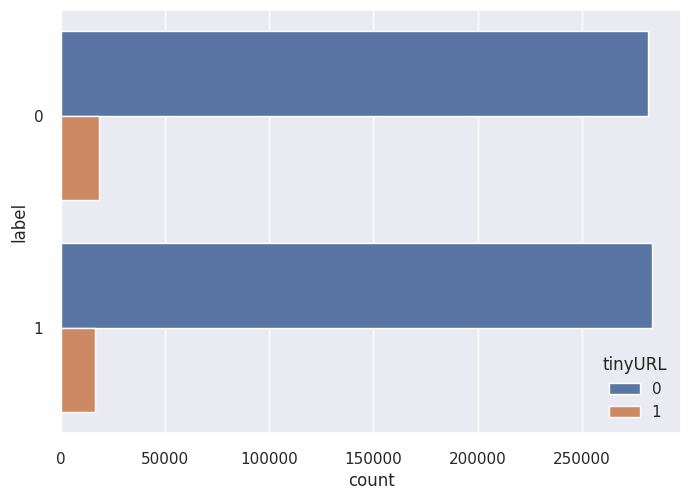

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="label", data=fe,hue="tinyURL")

In [ ]:
# sns.set(style="darkgrid")
# ax = sns.countplot(y="label", data=fe,hue="httpDomain")

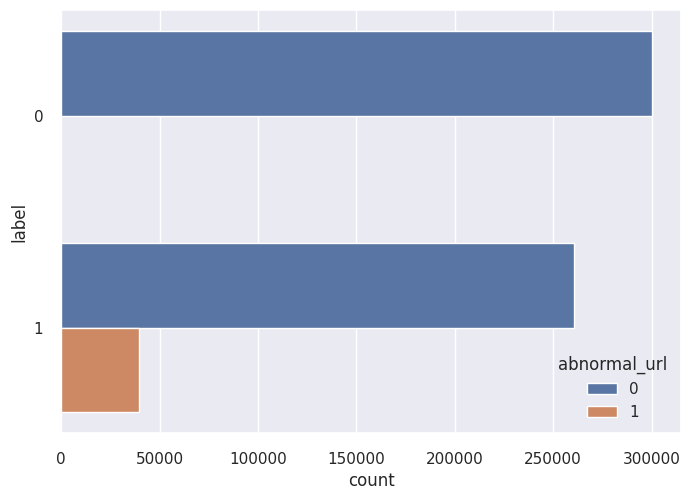

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="label", data=fe,hue="abnormal_url")

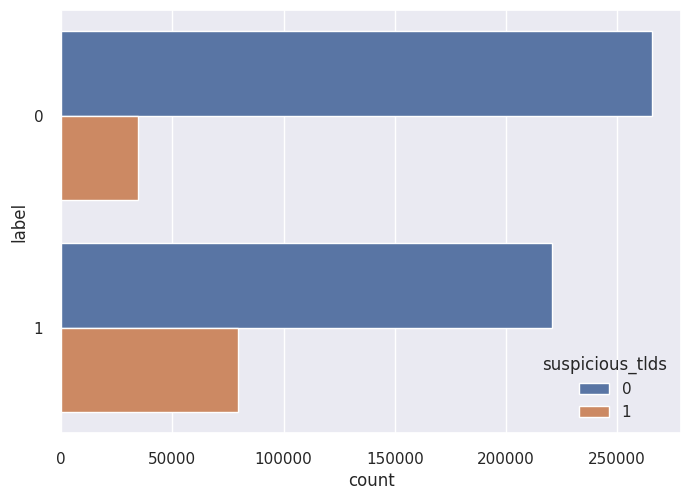

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="label", data=fe,hue="suspicious_tlds")

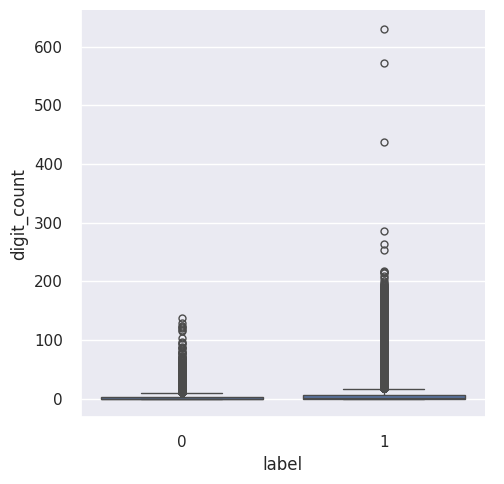

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="label", y="digit_count", kind="box", data=fe)

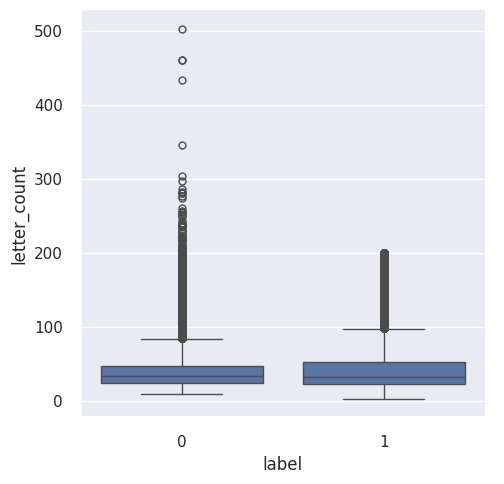

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="label", y="letter_count", kind="box", data=fe)

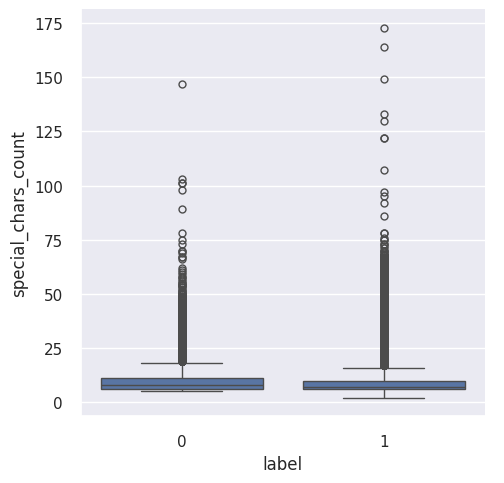

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="label", y="special_chars_count", kind="box", data=fe)

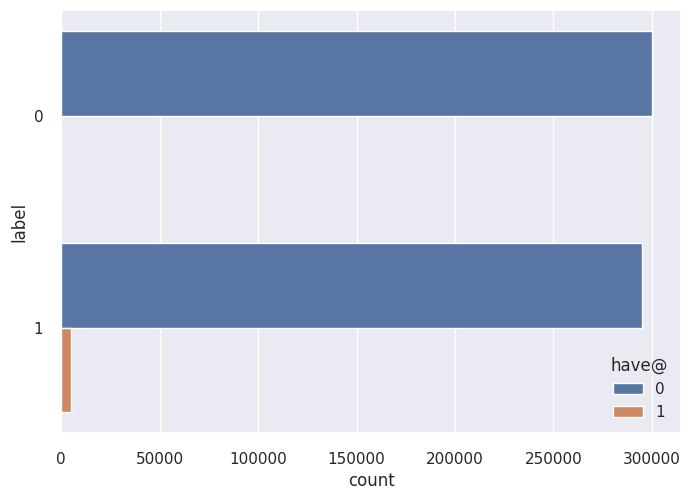

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="label", data=fe,hue="have@")

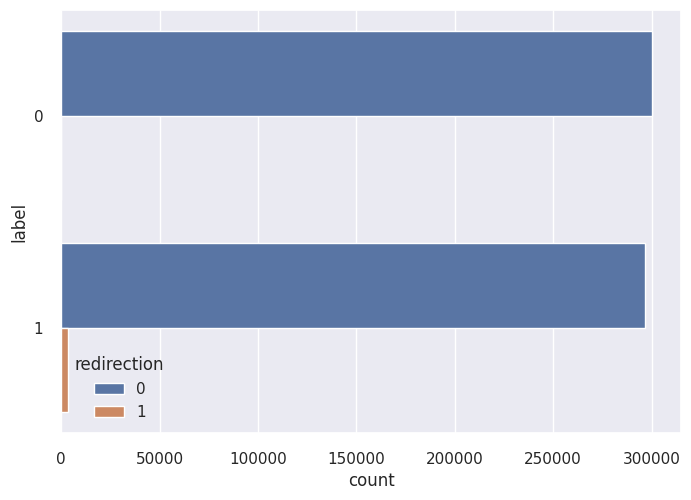

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="label", data=fe,hue="redirection")

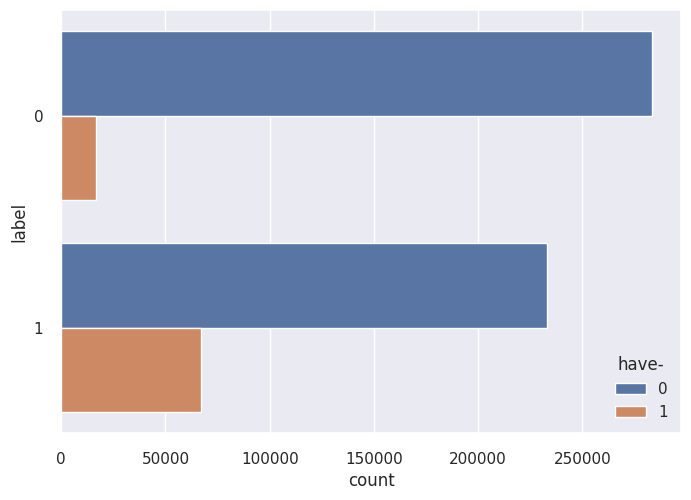

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="label", data=fe,hue="have-")

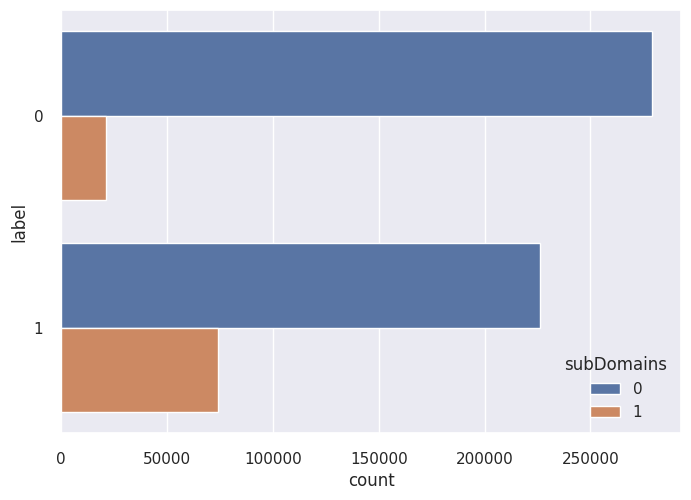

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="label", data=fe,hue="subDomains")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


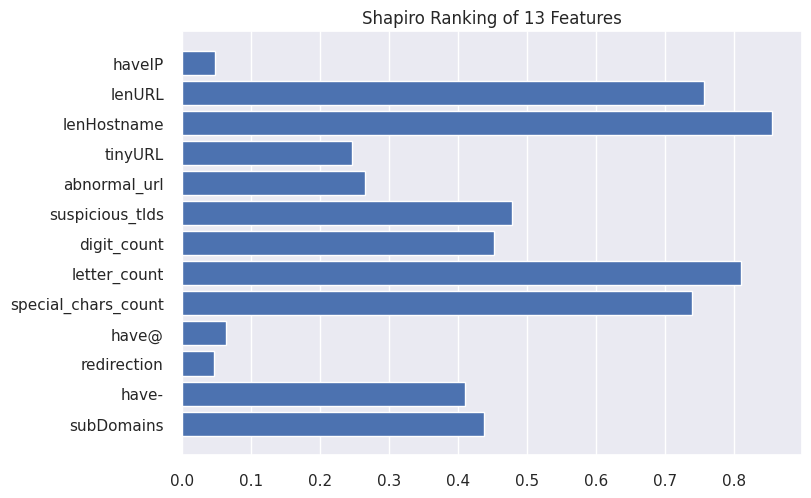

<Axes: title={'center': 'Shapiro Ranking of 13 Features'}>

In [ ]:
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
X = fe.copy().drop("label", axis=1)
Y = fe.copy()["label"]

features = ['haveIP', 'lenURL', 'lenHostname', 'tinyURL',
       'abnormal_url', 'suspicious_tlds', 'digit_count', 'letter_count',
       'special_chars_count', 'have@', 'redirection', 'have-', 'subDomains']
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit_transform(X=X.astype(int), y=Y)
visualizer.poof()